In [1]:
import pandas as pd
import numpy as np
from keras import models, layers, regularizers
from matplotlib import pyplot as plt
import seaborn as sn

Using TensorFlow backend.


# Loading Data

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.shape

(205, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
#Separating the company name and car name
companyName = data["CarName"].apply(lambda x: x.split(" ")[0])
data.insert(3,"companyname",companyName)
#Drop the garbage column of Carname
data.drop("CarName", axis=1, inplace=True)
data.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
print(data.companyname.unique())
print(data.fueltype.unique())
print(data.aspiration.unique())
print(data.doornumber.unique())
print(data.carbody.unique())
print(data.drivewheel.unique())
print(data.enginelocation.unique())
print(data.enginetype.unique())
print(data.cylindernumber.unique())
print(data.fuelsystem.unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [8]:
#setting the wrong spelling mistakes

#For Company Name
data.companyname = data.companyname.str.lower()
def correct_name(wrong,right):
    data.companyname.replace(wrong,right,inplace=True)
correct_name("maxda","mazda")
correct_name("porcshce", "porsche")
correct_name("toyouta","toyota")
correct_name("vokswagen", "volkswagen")
correct_name("vw","volkswagen")
data.companyname.unique()


#For Engine Location
data.drivewheel.replace("4wd","fwd",inplace=True)
#For Doornumber
data.doornumber.replace("two",2,inplace=True)
data.doornumber.replace("four",4,inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data["fueltype"]=labelencoder.fit_transform(data["fueltype"])
data["aspiration"]=labelencoder.fit_transform(data["aspiration"])
data["carbody"]=labelencoder.fit_transform(data["carbody"])
data["drivewheel"]=labelencoder.fit_transform(data["drivewheel"])
data["enginetype"]=labelencoder.fit_transform(data["enginetype"])
data["cylindernumber"]=labelencoder.fit_transform(data["cylindernumber"])
data["enginelocation"]=labelencoder.fit_transform(data["enginelocation"])
data["companyname"]=labelencoder.fit_transform(data["companyname"])
data["fuelsystem"]=labelencoder.fit_transform(data["fuelsystem"])
data

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,1,0,2,0,1,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0,1,0,2,0,1,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,0,1,0,2,2,1,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,1,0,4,3,0,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,21,1,0,4,3,1,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,21,1,1,4,3,1,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,21,1,0,4,3,1,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,21,0,1,4,3,1,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


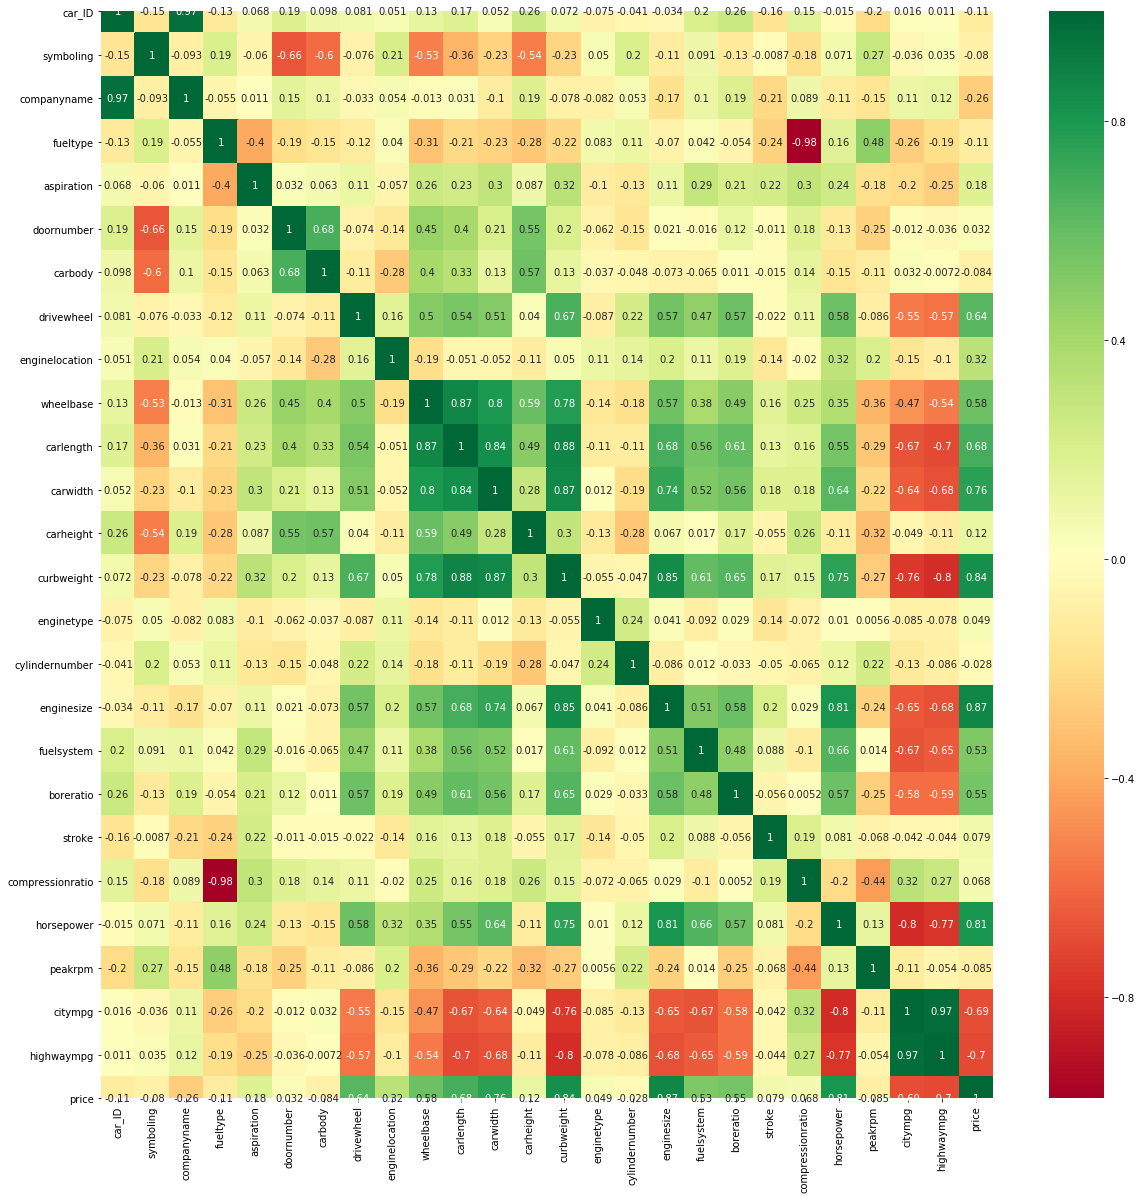

In [10]:
corrmat = data.corr()
top_features = corrmat.index
plt.figure(figsize=(20,20))
features = sn.heatmap(data[top_features].corr(), annot=True,cmap = "RdYlGn") 

In [11]:
data1 = data[["horsepower","boreratio","enginesize","curbweight","carwidth",'carlength',
              "wheelbase","drivewheel","enginelocation","price"]]
data1

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation,price
0,111,3.47,130,2548,64.1,168.8,88.6,1,0,13495.0
1,111,3.47,130,2548,64.1,168.8,88.6,1,0,16500.0
2,154,2.68,152,2823,65.5,171.2,94.5,1,0,16500.0
3,102,3.19,109,2337,66.2,176.6,99.8,0,0,13950.0
4,115,3.19,136,2824,66.4,176.6,99.4,0,0,17450.0
...,...,...,...,...,...,...,...,...,...,...
200,114,3.78,141,2952,68.9,188.8,109.1,1,0,16845.0
201,160,3.78,141,3049,68.8,188.8,109.1,1,0,19045.0
202,134,3.58,173,3012,68.9,188.8,109.1,1,0,21485.0
203,106,3.01,145,3217,68.9,188.8,109.1,1,0,22470.0


In [12]:
y = data1["price"]
data1.drop("price",axis = 1, inplace=True)
X_train = data1[:104]
Y_train = y[:104]
X_test = data1[104:165]
Y_test = y[104:165]
X_val = data1[165:]
Y_val = y[165:]

C:\Users\I.R.SH.A.D\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
data_mean = X_train.mean(axis=0)
X_train -= data_mean   
data_std = X_train.std(axis=0)
X_train /= data_std
X_val -= data_mean
X_val /= data_std
X_test -= data_mean
X_test/= data_std

In [14]:
X_train.fillna(0,inplace=True)
X_val.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)
X_train

C:\Users\I.R.SH.A.D\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
0,0.198511,0.874083,0.027917,0.077024,-0.677919,-0.241081,-1.519175,1.527153,0.0
1,0.198511,0.874083,0.027917,0.077024,-0.677919,-0.241081,-1.519175,1.527153,0.0
2,1.305421,-2.340538,0.453736,0.532163,-0.109996,-0.065953,-0.572621,1.527153,0.0
3,-0.033168,-0.265277,-0.378548,-0.272193,0.173965,0.328084,0.277672,-0.648517,0.0
4,0.301479,-0.265277,0.144049,0.533819,0.255097,0.328084,0.213499,-0.648517,0.0
...,...,...,...,...,...,...,...,...,...
99,-0.161878,0.304403,-0.165638,-0.293708,-0.231694,0.094580,-0.139453,-0.648517,0.0
100,-0.161878,0.304403,-0.165638,-0.330120,-0.231694,0.094580,-0.139453,-0.648517,0.0
101,1.253937,0.711317,1.015044,0.982338,0.295663,0.700230,0.373932,-0.648517,0.0
102,1.253937,0.711317,1.015044,1.315004,0.295663,0.911842,0.373932,-0.648517,0.0


# Building Model

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02), input_shape=(X_train.shape[1],)))
model.add(layers.Dense(14, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
model.add(layers.Dense(6, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
model.add(layers.Dense(1))

In [16]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [17]:
history = model.fit(X_train,Y_train,epochs=500)
history

Epoch 1/500
104/104 [==============================] - 0s 3ms/step - loss: 278437396.9231 - mae: 13790.9531
Epoch 2/500
104/104 [==============================] - 0s 86us/step - loss: 278431350.1538 - mae: 13790.6982
Epoch 3/500
104/104 [==============================] - 0s 58us/step - loss: 278425944.6154 - mae: 13790.4736
Epoch 4/500
104/104 [==============================] - 0s 86us/step - loss: 278420493.5385 - mae: 13790.2607
Epoch 5/500
104/104 [==============================] - 0s 86us/step - loss: 278414877.5385 - mae: 13790.0361
Epoch 6/500
104/104 [==============================] - 0s 77us/step - loss: 278409086.7692 - mae: 13789.8086
Epoch 7/500
104/104 [==============================] - 0s 96us/step - loss: 278403335.3846 - mae: 13789.5771
Epoch 8/500
104/104 [==============================] - 0s 77us/step - loss: 278396716.3077 - mae: 13789.3271
Epoch 9/500
104/104 [==============================] - 0s 96us/step - loss: 278388984.6154 - mae: 13789.0566
Epoch 10/500
104/104

104/104 [==============================] - 0s 77us/step - loss: 274216066.4615 - mae: 13658.8486
Epoch 76/500
104/104 [==============================] - 0s 77us/step - loss: 274048807.3846 - mae: 13653.7725
Epoch 77/500
104/104 [==============================] - 0s 86us/step - loss: 273877361.2308 - mae: 13648.4424
Epoch 78/500
104/104 [==============================] - 0s 105us/step - loss: 273723982.7692 - mae: 13643.6602
Epoch 79/500
104/104 [==============================] - 0s 67us/step - loss: 273535064.6154 - mae: 13638.0000
Epoch 80/500
104/104 [==============================] - 0s 86us/step - loss: 273331702.1538 - mae: 13632.0674
Epoch 81/500
104/104 [==============================] - 0s 67us/step - loss: 273146599.3846 - mae: 13626.3164
Epoch 82/500
104/104 [==============================] - 0s 67us/step - loss: 272954866.4615 - mae: 13620.5117
Epoch 83/500
104/104 [==============================] - 0s 86us/step - loss: 272756588.3077 - mae: 13614.6113
Epoch 84/500
104/104 [

104/104 [==============================] - 0s 96us/step - loss: 243332539.0769 - mae: 12712.8770
Epoch 150/500
104/104 [==============================] - 0s 96us/step - loss: 242575261.5385 - mae: 12689.8105
Epoch 151/500
104/104 [==============================] - 0s 115us/step - loss: 241757390.7692 - mae: 12665.2012
Epoch 152/500
104/104 [==============================] - 0s 96us/step - loss: 240875228.9231 - mae: 12637.4736
Epoch 153/500
104/104 [==============================] - 0s 86us/step - loss: 240222081.2308 - mae: 12615.4385
Epoch 154/500
104/104 [==============================] - 0s 96us/step - loss: 239498712.6154 - mae: 12591.7988
Epoch 155/500
104/104 [==============================] - 0s 105us/step - loss: 238628116.9231 - mae: 12564.8057
Epoch 156/500
104/104 [==============================] - 0s 86us/step - loss: 237765667.6923 - mae: 12537.7334
Epoch 157/500
104/104 [==============================] - 0s 86us/step - loss: 237006505.8462 - mae: 12512.7236
Epoch 158/500

104/104 [==============================] - 0s 67us/step - loss: 159276455.3846 - mae: 9816.5566
Epoch 223/500
104/104 [==============================] - 0s 86us/step - loss: 157693774.7692 - mae: 9759.5469
Epoch 224/500
104/104 [==============================] - 0s 77us/step - loss: 156005528.6154 - mae: 9699.6807
Epoch 225/500
104/104 [==============================] - 0s 96us/step - loss: 154332221.5385 - mae: 9638.1191
Epoch 226/500
104/104 [==============================] - 0s 58us/step - loss: 152744038.1538 - mae: 9578.3174
Epoch 227/500
104/104 [==============================] - 0s 67us/step - loss: 151402916.9231 - mae: 9526.7051
Epoch 228/500
104/104 [==============================] - 0s 67us/step - loss: 149923587.6923 - mae: 9470.1396
Epoch 229/500
104/104 [==============================] - 0s 77us/step - loss: 148528355.6923 - mae: 9417.4160
Epoch 230/500
104/104 [==============================] - 0s 67us/step - loss: 146930064.0000 - mae: 9356.0059
Epoch 231/500
104/104 [=

104/104 [==============================] - 0s 105us/step - loss: 51165774.6923 - mae: 5789.8232
Epoch 297/500
104/104 [==============================] - 0s 96us/step - loss: 50075904.6154 - mae: 5728.1396
Epoch 298/500
104/104 [==============================] - 0s 77us/step - loss: 48865341.0769 - mae: 5659.2939
Epoch 299/500
104/104 [==============================] - 0s 96us/step - loss: 47870410.1538 - mae: 5598.2510
Epoch 300/500
104/104 [==============================] - 0s 58us/step - loss: 46862026.7692 - mae: 5536.9463
Epoch 301/500
104/104 [==============================] - 0s 77us/step - loss: 45857939.6923 - mae: 5475.3066
Epoch 302/500
104/104 [==============================] - 0s 77us/step - loss: 44737464.9231 - mae: 5399.9502
Epoch 303/500
104/104 [==============================] - 0s 77us/step - loss: 43762777.8462 - mae: 5341.5723
Epoch 304/500
104/104 [==============================] - 0s 77us/step - loss: 42809713.8462 - mae: 5274.7168
Epoch 305/500
104/104 [=========

104/104 [==============================] - 0s 58us/step - loss: 25300429.5385 - mae: 4046.5076
Epoch 371/500
104/104 [==============================] - 0s 105us/step - loss: 25247847.3846 - mae: 4044.6892
Epoch 372/500
104/104 [==============================] - 0s 77us/step - loss: 25145622.7692 - mae: 4038.4905
Epoch 373/500
104/104 [==============================] - 0s 77us/step - loss: 25040418.0000 - mae: 4025.7620
Epoch 374/500
104/104 [==============================] - 0s 77us/step - loss: 24946598.1538 - mae: 4016.9138
Epoch 375/500
104/104 [==============================] - 0s 67us/step - loss: 24879828.3077 - mae: 4011.0122
Epoch 376/500
104/104 [==============================] - 0s 86us/step - loss: 24786181.5385 - mae: 4002.8889
Epoch 377/500
104/104 [==============================] - 0s 96us/step - loss: 24724280.6154 - mae: 3997.4170
Epoch 378/500
104/104 [==============================] - 0s 86us/step - loss: 24659280.6923 - mae: 3993.3306
Epoch 379/500
104/104 [=========

104/104 [==============================] - 0s 125us/step - loss: 18812301.7692 - mae: 3428.8479
Epoch 445/500
104/104 [==============================] - 0s 77us/step - loss: 18725994.5385 - mae: 3417.2190
Epoch 446/500
104/104 [==============================] - 0s 115us/step - loss: 18651748.6154 - mae: 3406.7383
Epoch 447/500
104/104 [==============================] - 0s 125us/step - loss: 18620726.6154 - mae: 3402.1780
Epoch 448/500
104/104 [==============================] - 0s 153us/step - loss: 18501648.8462 - mae: 3388.3474
Epoch 449/500
104/104 [==============================] - 0s 105us/step - loss: 18393373.5385 - mae: 3379.3533
Epoch 450/500
104/104 [==============================] - 0s 105us/step - loss: 18312602.0000 - mae: 3364.9021
Epoch 451/500
104/104 [==============================] - 0s 134us/step - loss: 18204474.3077 - mae: 3352.4177
Epoch 452/500
104/104 [==============================] - 0s 86us/step - loss: 18169137.5385 - mae: 3348.2512
Epoch 453/500
104/104 [===

# K_Fold Validation

In [18]:
k = 4
num_val_samples = len(X_train) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = Y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X_train[:i * num_val_samples],X_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([Y_train[:i * num_val_samples],Y_train[(i + 1) * num_val_samples:]],axis=0)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02), input_shape=(X_train.shape[1],)))
model.add(layers.Dense(14, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
model.add(layers.Dense(6, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
# network.add(layers.Dense(4, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(partial_train_data, partial_train_targets,
validation_data=(X_val, Y_val),epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)
history.history

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


{'val_loss': [188653244.2,
  188650940.7,
  188639294.2,
  188610965.8,
  188565113.3,
  188488740.4,
  188353469.1,
  188135533.7,
  187832628.4,
  187356536.9,
  186636837.4,
  185651917.4,
  184414778.5,
  182752485.1,
  180614417.2,
  178104857.3,
  174878347.2,
  171431693.4,
  167057305.9,
  162014180.8,
  156492240.5,
  150344202.5,
  143591864.2,
  135896410.45,
  128300202.2,
  120124341.6,
  111443603.425,
  102119436.875,
  93475180.975,
  83845111.9625,
  74714326.8875,
  65782852.5,
  56532243.61875,
  47516147.43125,
  39604699.1515625,
  32296102.834451295,
  25892080.50078125,
  20376051.187890626,
  16508347.090877915,
  14615150.744921874,
  15117705.078320313,
  17278244.252097894,
  20541810.7453125,
  23675523.95,
  26317945.723828126,
  28271193.116308592,
  30075137.057128906,
  31213899.54160156,
  33022058.441796876,
  34391392.10976563,
  35980389.35625,
  36219118.82148437,
  36219044.71259765,
  36527244.83969116,
  36603725.68487549,
  37200468.3891571,
  3

In [19]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

# Epochs and Validation mae 

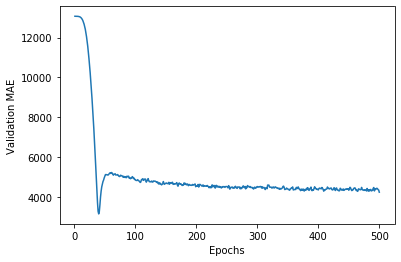

In [20]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

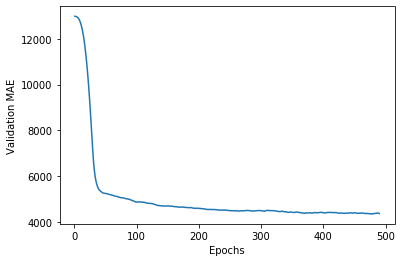

In [21]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# Again train the model

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', kernel_regularizer =regularizers.l2(0.02), input_shape=(X_train.shape[1],)))
model.add(layers.Dense(14, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
model.add(layers.Dense(6, activation='relu', kernel_regularizer =regularizers.l2(0.002)))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(X_train, Y_train,epochs=200, batch_size=16, verbose=0)

In [23]:
y_pred = model.predict(X_test)
y_pred

array([[13586.659 ],
       [16105.268 ],
       [16964.174 ],
       [14647.926 ],
       [18086.604 ],
       [18631.033 ],
       [22154.842 ],
       [14738.16  ],
       [18290.182 ],
       [18721.268 ],
       [22358.42  ],
       [14851.505 ],
       [18290.182 ],
       [19156.904 ],
       [ 7631.6143],
       [ 5862.901 ],
       [ 7542.451 ],
       [ 6855.8867],
       [ 6296.425 ],
       [ 2749.4294],
       [12547.727 ],
       [15025.172 ],
       [       nan],
       [       nan],
       [       nan],
       [31864.65  ],
       [ 3494.097 ],
       [ 2938.476 ],
       [ 6032.822 ],
       [ 6169.774 ],
       [ 1831.5554],
       [ 6402.964 ],
       [ 9421.673 ],
       [ 9566.028 ],
       [ 5829.79  ],
       [ 5168.612 ],
       [ 4963.891 ],
       [ 2789.6199],
       [ 2785.7144],
       [ 2915.9736],
       [ 2829.5964],
       [ 3586.4814],
       [ 2790.202 ],
       [ 3127.1604],
       [ 2891.9385],
       [ 3937.1736],
       [ 7165.148 ],
       [ 7065

In [24]:
test_mse_score, test_mae_score  =model.evaluate(X_train, Y_train)

104/104 [==============================] - 0s 710us/step


In [25]:
test_mae_score

4928.6142578125

In [26]:
test_mse_score

38879263.538461536